<a href="https://colab.research.google.com/github/phu234/nhandang_xulyanh/blob/main/kysuphu_ndxla_baitap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chương 2: Biến đổi xử lý ảnh 






## Tính lược đồ ảnh





In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

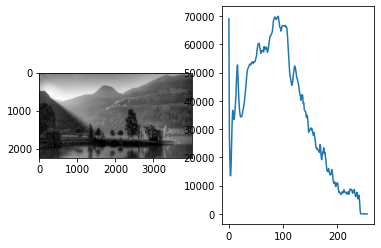

In [ ]:
img = cv.imread('/content/drive/MyDrive/phu1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.plot(hist_full)
plt.show()

## Điều chỉnh mức sáng

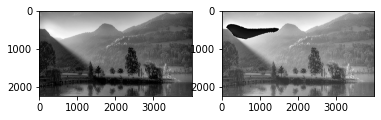

In [ ]:
new_img= img + 50
img[img>255] = 255
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(new_img, 'gray')
plt.show()

## Cân bằng lược đồ ảnh

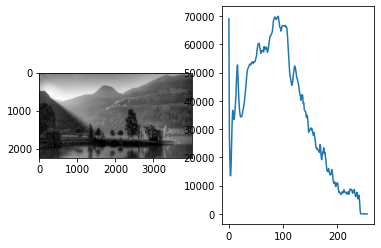

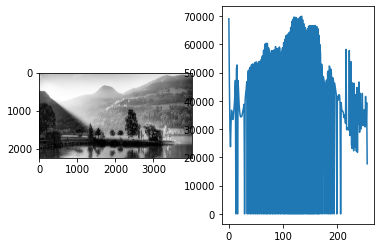

In [ ]:
#ẢNH XÁM
img1 = cv.imread('/content/drive/MyDrive/phu1.jpg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"
hist_img1 = cv.calcHist([img1],[0],None,[256],[0,256])

# can bang luoc do anh img1
img1_equalize = cv.equalizeHist(img1)
hist_img1_equalize = cv.calcHist([img1_equalize],[0],None,[256],[0,256])

# hien thi anh va luoc do anh ban dau img1
plt.subplot(121), plt.imshow(img1, 'gray')
plt.subplot(122), plt.plot(hist_img1)
plt.show()

# hien thi anh va luoc do anh sau khi can bang 
plt.subplot(121), plt.imshow(img1_equalize, 'gray')
plt.subplot(122), plt.plot(hist_img1_equalize)
plt.show()

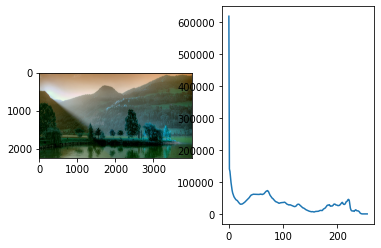

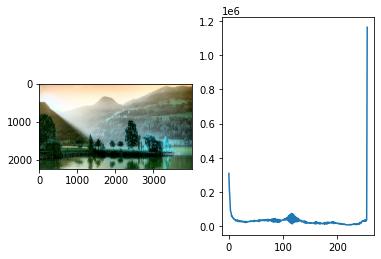

In [ ]:
#ẢNH MÀU
img2 = cv.imread('/content/drive/MyDrive/phu1.jpg')
assert img2 is not None, "file could not be read, check with os.path.exists()"
hist_img2 = cv.calcHist([img2],[0],None,[256],[0,256])

# bien doi ve he mau HSV 
img2_yuv = cv.cvtColor(img2, cv.COLOR_BGR2YUV)
img2_yuv[:,:,0] = cv.equalizeHist(img2_yuv[:,:,0])

# chuyen ve lai he mau ban dau RGB va can bang luoc do anh
img2_equalize = cv.cvtColor(img2_yuv, cv.COLOR_YUV2BGR)
hist_img2_equalize = cv.calcHist([img2_equalize],[0],None,[256],[0,256])

# hien thi anh va luoc do anh ban dau img2
plt.subplot(121), plt.imshow(img2)
plt.subplot(122), plt.plot(hist_img2)
plt.show()

# hien thi anh va luoc do anh sau khi can bang 
plt.subplot(121), plt.imshow(img2_equalize)
plt.subplot(122), plt.plot(hist_img2_equalize)
plt.show()

## Lọc trung bình 

### Bằng cv2 blur

()

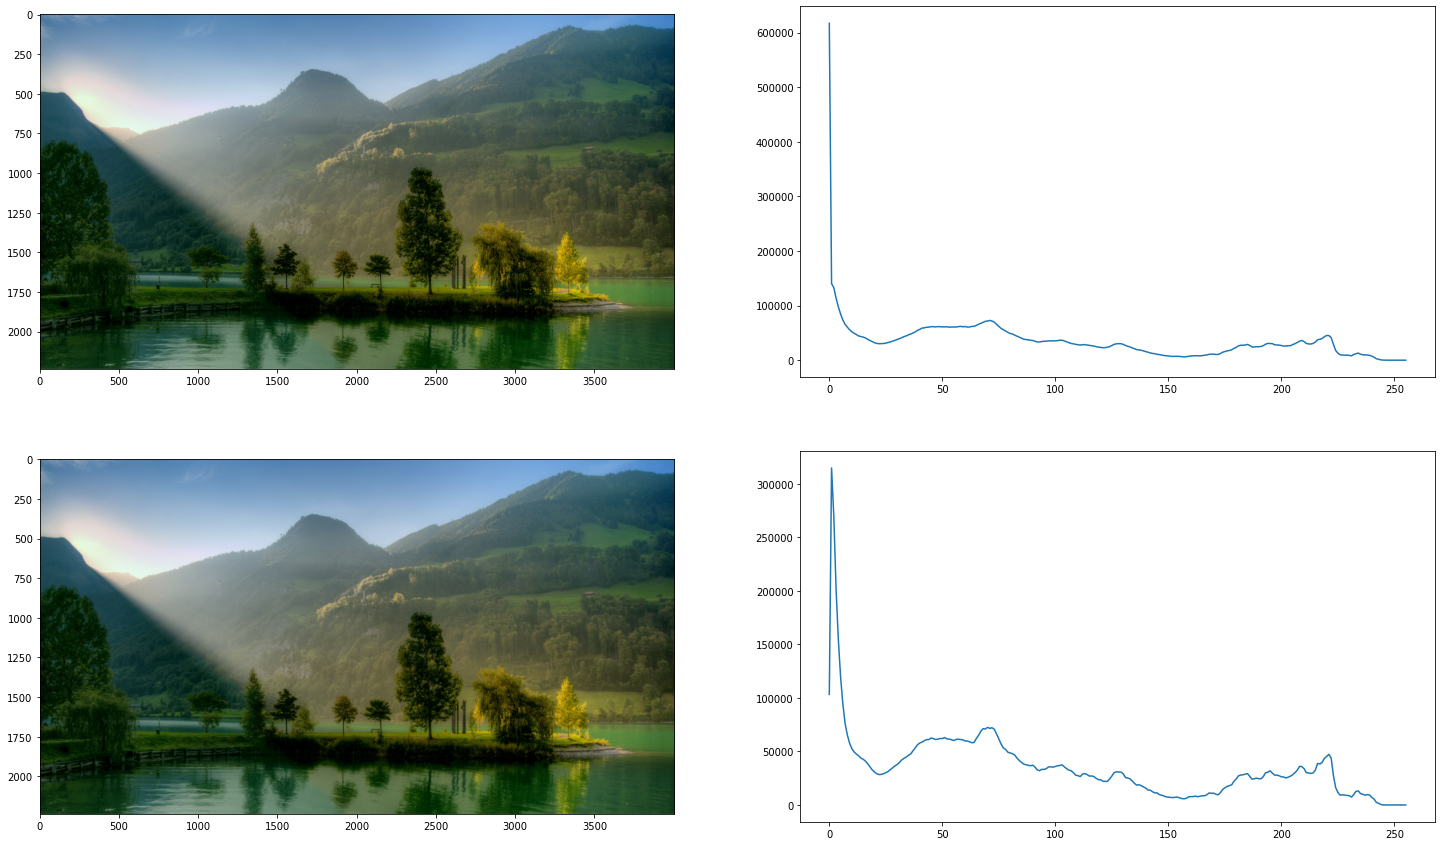

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

# Load and blur image
img = cv2.imread('/content/drive/MyDrive/phu1.jpg')
blur = cv2.blur(img,(5,5))

# Convert color from bgr (OpenCV default) to rgb
img_rgb = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
blur_rgb = cv2.cvtColor(blur, cv.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(25,15))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(222), plt.plot(cv2.calcHist([image],[0],None,[256],[0,256]))
plt.subplot(223), plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.subplot(224), plt.plot(cv2.calcHist([blurred_img],[0],None,[256],[0,256]))
plt.show
()

### Bằng kernel tự xây

()

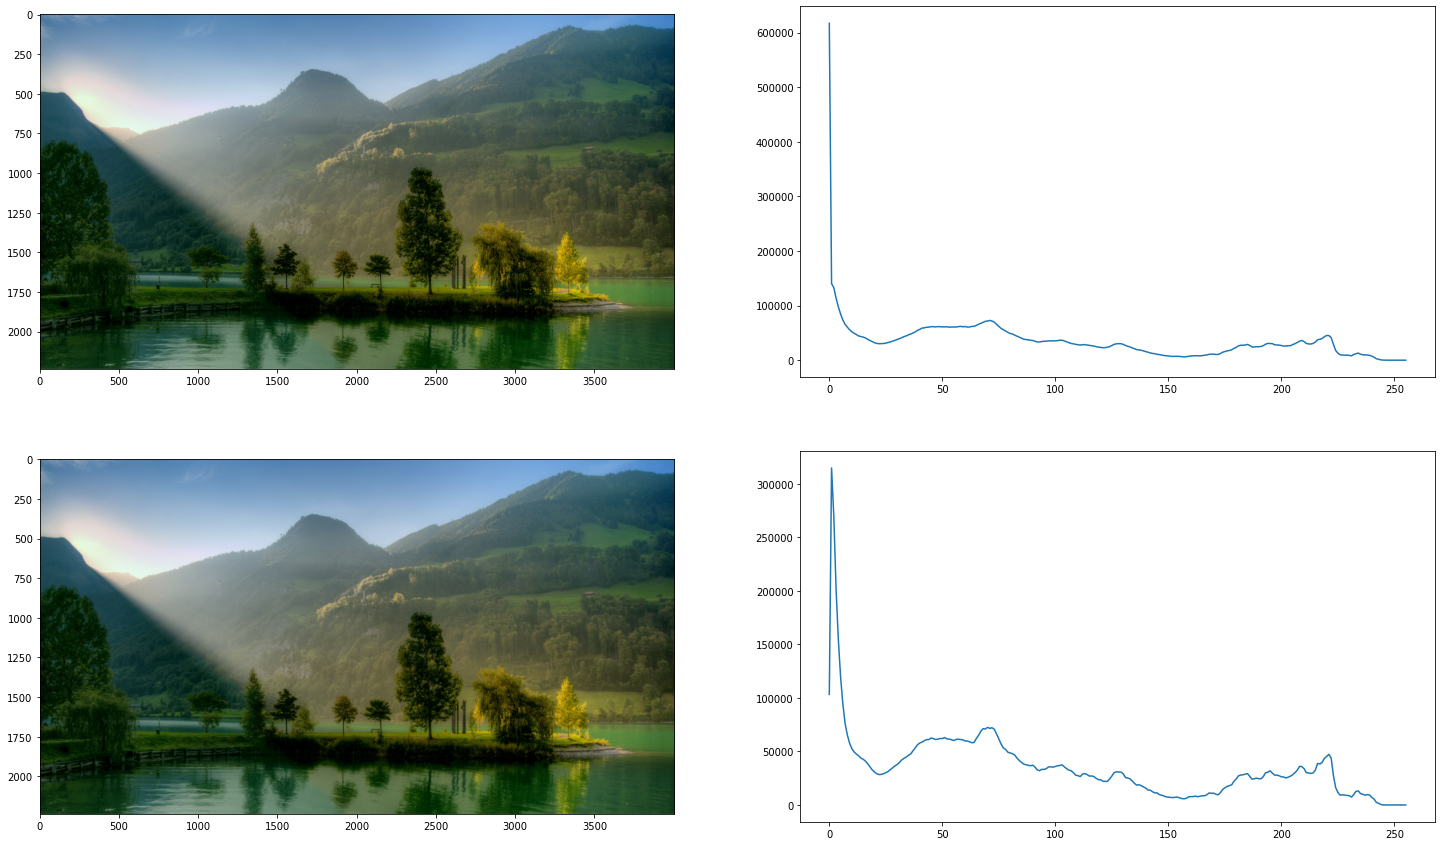

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
 
image = cv2.imread('/content/drive/MyDrive/phu1.jpg')
 
# Print error message if image is null
if image is None:
    print('Could not read image')
 
# Apply blurring kernel
kernel2 = np.ones((5, 5), np.float32) / 25
blurred_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)
 
# cv2_imshow(image)
# cv2_imshow(img)
plt.figure(figsize=(25,15))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(222), plt.plot(cv2.calcHist([image],[0],None,[256],[0,256]))
plt.subplot(223), plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.subplot(224), plt.plot(cv2.calcHist([blurred_img],[0],None,[256],[0,256]))
plt.show
() 

## Lọc với Gaussian

### Bằng cv2 Gaussian Blur

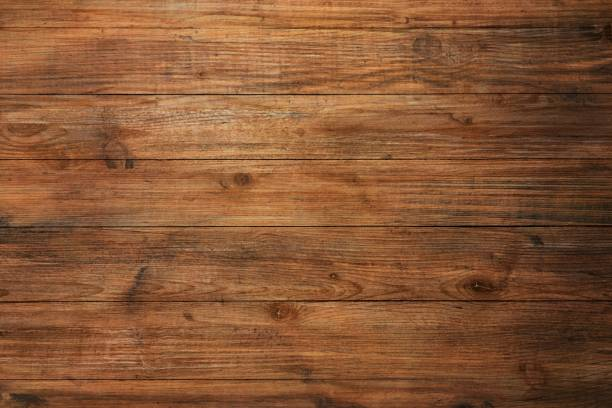

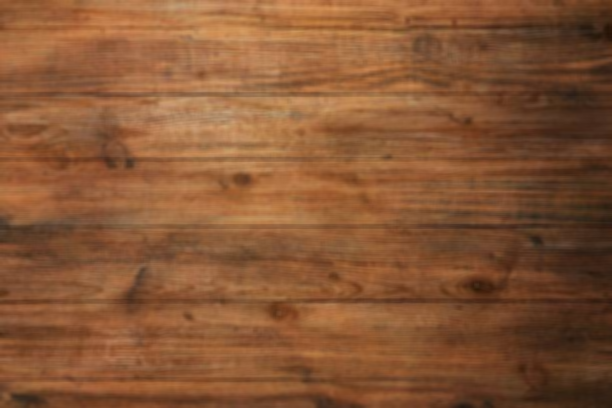

In [ ]:
# LOC GAUSSIAN
image = cv.imread('/content/drive/MyDrive/wood.jpg')
assert image is not None, "file could not be read, check with os.path.exists()"
image2= cv.GaussianBlur(image, (5,5), cv.BORDER_DEFAULT)
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2_imshow(image2)

### Bằng Filter tự xây

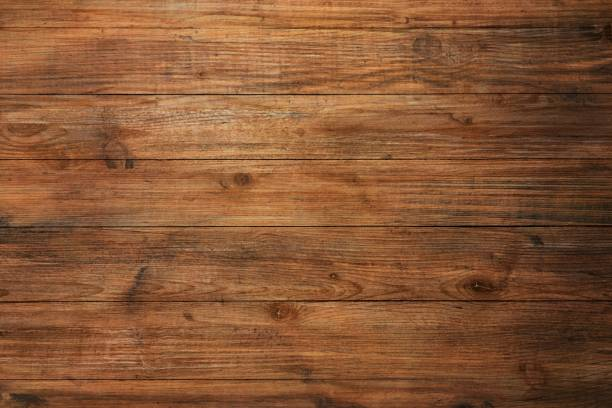

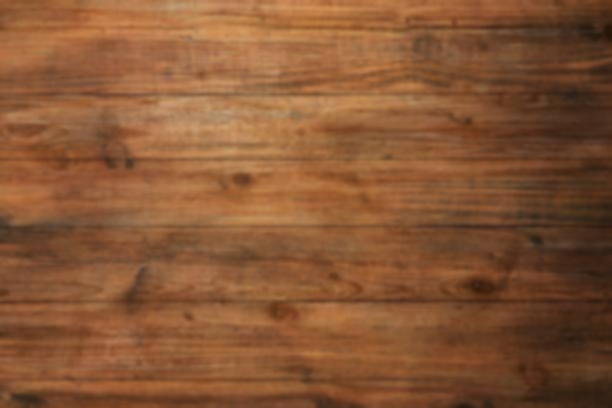

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
cv2.destroyAllWindows()
image = cv.imread('/content/drive/MyDrive/wood.jpg')
cv2_imshow(image)
kernelSizes = [(9, 9)]

# loop over the kernel sizes again
for (kX, kY) in kernelSizes:
	# apply a "Gaussian" blur to the image
	blurred = cv2.GaussianBlur(image, (kX, kY), 0)
	cv2_imshow(blurred)
	cv2.waitKey(0)

## Lọc cạnh với Sobel

### Lọc bằng hàm cv2 Sobel

#### Lọc bằng bộ lọc Sobel

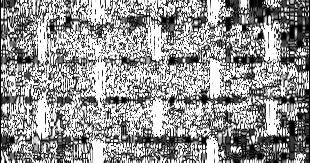

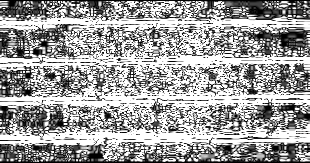

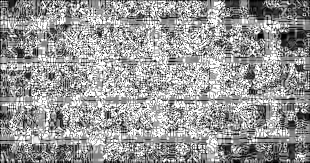

In [ ]:
# LOC SOBER
img = cv.imread('/content/drive/MyDrive/brick.jpg',cv.IMREAD_GRAYSCALE)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
sobelx = cv.convertScaleAbs(sobelx)
sobely = cv.convertScaleAbs(sobely)
# combine the gradient representations into a single image
combined = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0) 
from google.colab.patches import cv2_imshow
cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(combined)

#### Lọc bằng bộ lọc Scharr

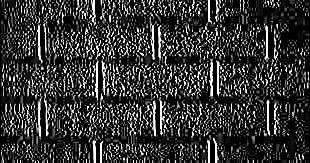

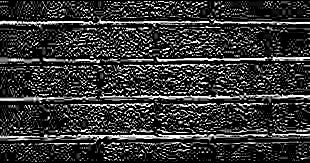

In [ ]:
# import required libraries
import cv2

# read the input image as a grayscale image
img = cv2.imread('/content/drive/MyDrive/brick.jpg',0)

# compute the 1st order Sobel derivative in x direction
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)

# compute the 1st order Sobel derivative in y direction
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)

# display scharrx and scharry
cv2_imshow( scharrx)
cv2.waitKey(0)
cv2_imshow( scharry)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Lọc bằng bộ lọc tự xây

#### Lọc bằng bộ lọc Sobel


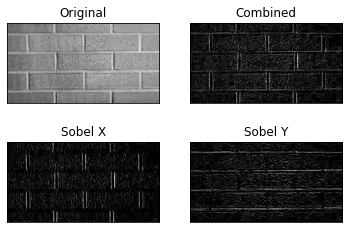

In [ ]:
img = cv.imread('/content/drive/MyDrive/brick.jpg', 0)
assert img is not None, "file could not be read, check with os.path.exists()"

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobelx = cv.filter2D(img, -1, sobel_x)
sobely = cv.filter2D(img, -1, sobel_y)
combined = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0) 

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(combined,cmap = 'gray')
plt.title('Combined'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

#### Lọc bằng bộ lọc Scharr

# Chương 3: Phân đoạn ảnh

## Phân đoạn bằng lặp chọn ngưỡng tự động


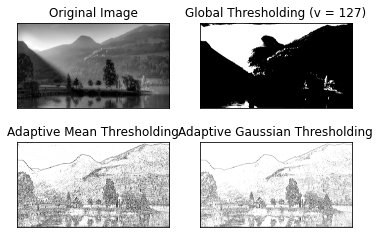

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/drive/MyDrive/phu1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## Phân đoạn bằng Otsu

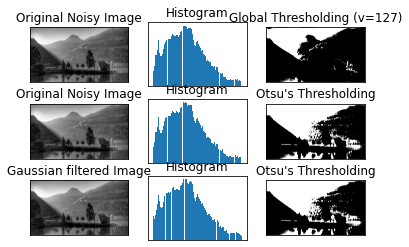

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/drive/MyDrive/phu1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()